In [1]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from matplotlib import pyplot as plt
from numpy import mean
import os
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
test_data =pd.read_csv(r'C:\Users\User\Soft Computing\Assignment 2\Dataset\Dataset_2/verification_test.csv')
train_data = pd.read_csv(r'C:\Users\User\Soft Computing\Assignment 2\Dataset\Dataset_2/verification_train.csv')

In [3]:
test_label=test_data['label']
test_data=test_data.drop(labels='label',axis=1)
test_data=test_data/255.0
test_data=test_data.values.reshape(-1,28,28,1)
test_dataset = list(zip(test_data,test_label))
print(len(test_dataset))

10000


In [4]:
train_label=train_data['label']
train_data=train_data.drop(labels='label',axis=1)
train_data=train_data/255.0
train_data=train_data.values.reshape(-1,28,28,1)
train_dataset = list(zip(train_data,train_label))
print(len(train_dataset))

60000


In [5]:
# Hyperparameters
batch_size = 32
num_iters = 10000
input_dim = 28*28 # num_features = 784
num_hidden = 100
output_dim = 10
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        
        self.relu_5= nn.ReLU()
 
        
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 
# INSTANTIATE MODEL CLASS
 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)
 
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
Iteration_loss =[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3007583618164062. Accuracy: 14.78
Iteration: 1000. Loss: 2.2941043376922607. Accuracy: 26.76
Iteration: 1500. Loss: 2.2497785091400146. Accuracy: 30.28
Iteration: 2000. Loss: 1.555936574935913. Accuracy: 53.89
Iteration: 2500. Loss: 0.9615309834480286. Accuracy: 58.45
Iteration: 3000. Loss: 1.0216425657272339. Accuracy: 64.48
Iteration: 3500. Loss: 0.606977641582489. Accuracy: 66.92
Iteration: 4000. Loss: 0.9557166695594788. Accuracy: 65.77
Iteration: 4500. Loss: 0.6587153077125549. Accuracy: 75.3
Iteration: 5000. Loss: 0.7880039215087891. Accuracy: 75.21
Iteration: 5500. Loss: 0.7483351230621338. Accuracy: 74.84
Iteration: 6000. Loss: 0.8932590484619141. Accuracy: 76.2
Iteration: 6500. Loss: 0.6061732172966003. Accuracy: 76.86
Iteration: 7000. Loss: 0.6608557105064392. Accuracy: 77.66
Iteration: 7500. Loss: 0.3332189619541168. Accuracy: 79.56
Iteration: 8000. Loss: 0.5832746028900146. Accuracy: 80.88
Iteration: 8500. Loss: 0.41410622000694275. Accuracy: 78.82
I

[2.3007583618164062, 2.2941043376922607, 2.2497785091400146, 1.555936574935913, 0.9615309834480286, 1.0216425657272339, 0.606977641582489, 0.9557166695594788, 0.6587153077125549, 0.7880039215087891, 0.7483351230621338, 0.8932590484619141, 0.6061732172966003, 0.6608557105064392, 0.3332189619541168, 0.5832746028900146, 0.41410622000694275, 0.7155559062957764]


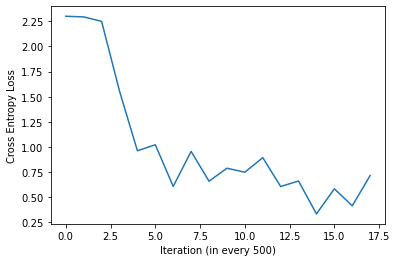

In [6]:
import matplotlib
import matplotlib.pyplot as plt
print (Iteration_loss)
plt.plot(Iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.savefig("C:/Users/User/Soft Computing/Assignment 2/Dataset/Dataset A/lossvsiteration for DatasetC for exp2.png")
plt.show()

In [8]:
root_path = 'C:/Users/User/Soft Computing/Assignment 2'
save_model = True

if save_model is True:
    # Saves only parameters
    # weights & biases
    torch.save(model.state_dict(), root_path + 'Assignment2_Exp2DatasetCexp2.pkl') 

load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Assignment2_Exp2DatasetCexp2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded
